In [ ]:
# penguins exercise from sklearn course 2024-04 

In [11]:
import os 
os.getcwd()
import matplotlib.pyplot as plt


In [13]:
import pandas as pd

penguins = pd.read_csv("datasets/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
# penguins = (
#     penguins.set_index("Species").loc[["Adelie", "Chinstrap"]].reset_index()
# )
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [14]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.988


/tmp/ipykernel_122559/3295076882.py:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


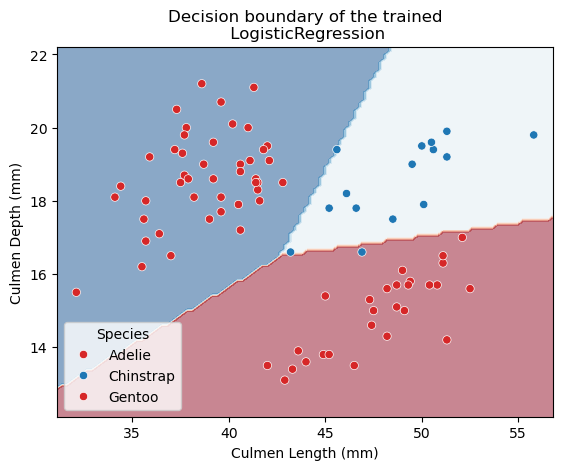

In [17]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(data_train, target_train)

In [23]:
clf.score(data_test, target_test)

0.9767441860465116

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(max_iter=100).fit(data_train, target_train)
clf.score(data_test, target_test)

0.9883720930232558

In [ ]:
from sklearn.model_selection import cross_validate
model = HistGradientBoostingClassifier(max_iter=100)



## Blood transfusion    

In [28]:
data = pd.read_csv("datasets/blood_transfusion.csv")

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np 

In [31]:
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [36]:
X = data[["Recency", "Frequency", "Monetary", "Time" ]]
Y = data[["Class"]]

In [30]:

model = make_pipeline(StandardScaler(), SVC())
gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"

train_sizes = np.linspace(0.1, 1, num=10)


In [38]:
from sklearn.model_selection import cross_validate


In [44]:
idxs = np.arange(X.shape[0])


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
for s in train_sizes:

    cv_results = cross_validate(model, X, Y)
    scores = cv_results["test_score"]


In [39]:
help(cross_validate)

Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, return_indices=False, error_score=nan)
    Evaluate metric(s) by cross-validation and also record fit/score times.

    Read more in the :ref:`User Guide <multimetric_cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like of shape (n_samples,), default=None
        Group labels for the sampl